In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

In [253]:
df=pd.read_csv("/content/healthcare_datasets.csv")

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      3021 non-null   object
 1   Age             3021 non-null   object
 2   Gender          3021 non-null   object
 3   Blood_Pressure  3021 non-null   object
 4   Cholesterol     3021 non-null   object
 5   Condition       2027 non-null   object
dtypes: object(6)
memory usage: 141.7+ KB


In [255]:
df.describe()

Patient_ID   Age  Gender Blood_Pressure Cholesterol Condition
count        3021  3021    3021           3021        3021      2027
unique       2997    74       3            102         202         2
top           NAN    55  Female            180         182  Diabetes
freq            4    58    1564             45          27      1035

In [288]:
df.head()

Patient_ID Age  Gender Blood_Pressure  \
0  0f5343ac-b858-4726-b8e6-d0e5a7cd73ff  84    Male             95   
1  ff6cbae7-14d6-486d-a03b-c174dce2b9c0  40    Male            163   
2  cc32f20a-c701-4398-85cc-30cfe5e7a62a  72    Male            NAN   
3  93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a  39    Male            118   
4  044838d9-29a8-46da-8d74-18705c8df5d7  28  Female            128   

  Cholesterol     Condition  
0         157  Hypertension  
1         285           NaN  
2         168           NaN  
3         288      Diabetes  
4         229      Diabetes

# 1.Removing Duplicates

In [257]:
df.duplicated().sum()

np.int64(20)

In [258]:
df.drop_duplicates(inplace=True) #20 duplicates are deleted

In [259]:
df.describe()

Patient_ID   Age  Gender Blood_Pressure Cholesterol Condition
count        3001  3001    3001           3001        3001      2011
unique       2997    74       3            102         202         2
top           NAN    55  Female            118         266  Diabetes
freq            4    58    1556             43          27      1026

# 2.Handling Missing Values

## Removing Columns

In [260]:
new_df=df.drop(columns=['Patient_ID']) #Patient_ID column will be removed as there is no use with it
new_df

Age  Gender Blood_Pressure Cholesterol     Condition
0     84    Male             95         157  Hypertension
1     40    Male            163         285           NaN
2     72    Male            NAN         168           NaN
3     39    Male            118         288      Diabetes
4     28  Female            128         229      Diabetes
...   ..     ...            ...         ...           ...
3016  73  Female             96         273  Hypertension
3017  30  Female             98         168  Hypertension
3018  52    Male             94         247  Hypertension
3019  21    Male            169         166      Diabetes
3020  79    Male             90         181  Hypertension

[3001 rows x 5 columns]

In [261]:
[new_df['Condition'].unique()]

[array(['Hypertension', nan, 'Diabetes'], dtype=object)]

In [262]:
new_df.fillna({'Condition':'Healthy'},inplace=True)

In [263]:
new_df=new_df.replace("NAN",np.nan,inplace=False) #Brought recognizable null values to recognizable null
new_df

Age  Gender Blood_Pressure Cholesterol     Condition
0     84    Male             95         157  Hypertension
1     40    Male            163         285       Healthy
2     72    Male            NaN         168       Healthy
3     39    Male            118         288      Diabetes
4     28  Female            128         229      Diabetes
...   ..     ...            ...         ...           ...
3016  73  Female             96         273  Hypertension
3017  30  Female             98         168  Hypertension
3018  52    Male             94         247  Hypertension
3019  21    Male            169         166      Diabetes
3020  79    Male             90         181  Hypertension

[3001 rows x 5 columns]

In [264]:
new_df.isnull().mean()*100 #For checking null percentage in columns

Age               0.066644
Gender            0.133289
Blood_Pressure    0.099967
Cholesterol       0.066644
Condition         0.000000
dtype: float64

# Splitting Data

In [265]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Condition', axis=1), new_df['Condition'], test_size=0.2, random_state=42)
X_train.shape,X_test.shape


((2400, 4), (601, 4))

### To get seperated numerical columns and categorical columns

In [266]:
for column in new_df.columns:
      try:
          new_df[column] = pd.to_numeric(new_df[column], errors='ignore')
      except ValueError:
          print(f"Could not convert column {column} to numeric due to non-numeric values.")
numerical_cols = new_df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_cols)
categorical_cols=X_train.drop(columns=numerical_cols).columns.tolist()
print("Categorical Columns:",categorical_cols)

Numerical Columns: ['Age', 'Blood_Pressure', 'Cholesterol']
Categorical Columns: ['Gender']


<ipython-input-266-62d1635894ae>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_df[column] = pd.to_numeric(new_df[column], errors='ignore')


## Imputation

In [268]:
# print(new_df['Age'].median())
# print(new_df['Blood_Pressure'].median())
# new_df['Cholesterol'].median()

In [269]:
num_imputer=SimpleImputer(strategy='median')
num_imputer.fit(X_train[numerical_cols])
X_train[numerical_cols]=num_imputer.transform(X_train[numerical_cols])
X_test[numerical_cols]=num_imputer.transform(X_test[numerical_cols])

# Imputing Categorical columns
cat_imputer=SimpleImputer(strategy='most_frequent')
X_train[categorical_cols]=cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols]=cat_imputer.transform(X_test[categorical_cols])


In [270]:
X_train.shape, X_test.shape

((2400, 4), (601, 4))

In [271]:
X_train.isnull().mean()*100,  X_test.isnull().mean()*100

(Age               0.0
 Gender            0.0
 Blood_Pressure    0.0
 Cholesterol       0.0
 dtype: float64,
 Age               0.0
 Gender            0.0
 Blood_Pressure    0.0
 Cholesterol       0.0
 dtype: float64)

# 3. Handling Outliers

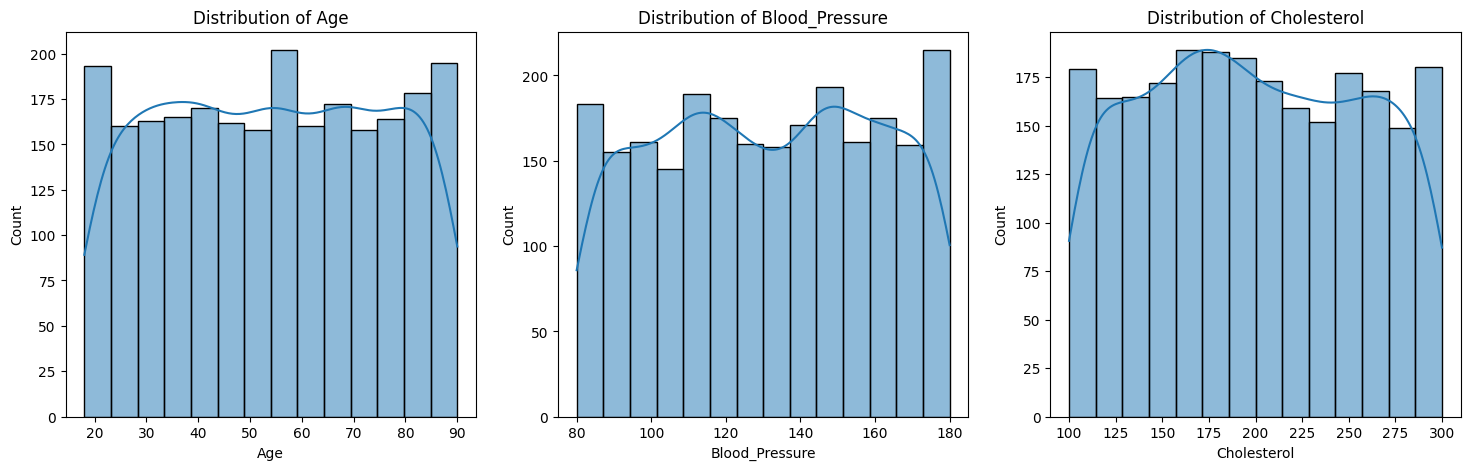

In [272]:
plt.figure(figsize=(18, 5))

# Create subplots for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)  # Adjust subplot grid as needed
    sns.histplot(X_train[col], kde =True)
    plt.title(f"Distribution of {col}")

plt.show()

In [273]:
# Here we can see Age is normally distributed- Go for Z-score method for Age
# Blood_pressure is slightly skewed- IQR as there skew, it handles robust skewness
# Cholesterol is more skew and some extreme values- IQR

## Z-Score for Age

In [274]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X_train['Age']))
X_train = X_train[(z_scores < 3)]
X_train

Age  Gender  Blood_Pressure  Cholesterol
720   89.0    Male           137.0        101.0
246   62.0    Male           132.0        186.0
1717  46.0    Male           157.0        153.0
1030  62.0    Male           137.0        114.0
1592  88.0  Female           121.0        251.0
...    ...     ...             ...          ...
1658  47.0    Male           133.0        222.0
1115  20.0    Male           166.0        165.0
1150  23.0  Female           101.0        196.0
1314  85.0    Male           109.0        255.0
880   81.0  Female           150.0        102.0

[2400 rows x 4 columns]

## IQR for B_P and Cholesterol

In [275]:
for col in ['Blood_Pressure','Cholesterol']:
  Q1 = X_train[col].quantile(0.25)
  Q3 = X_train[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X_train = X_train[(X_train[col] >= lower_bound) & (X_train[col] <= upper_bound)]
  X_test = X_test[(X_test[col] >= lower_bound) & (X_test[col] <= upper_bound)]


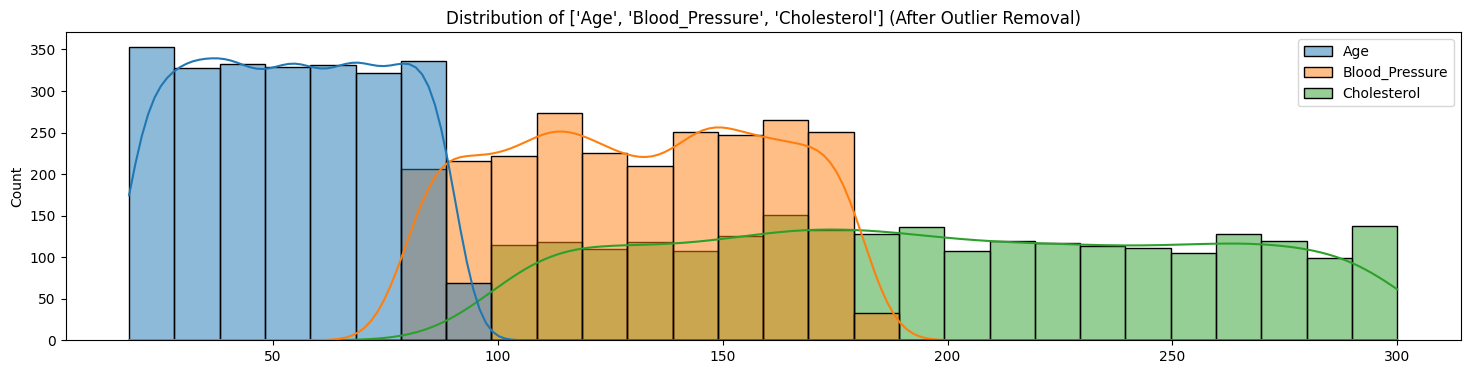

In [276]:
for col in [numerical_cols]:
    plt.figure(figsize=(18, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col} (After Outlier Removal)')
    plt.show()

## Statistical Measurement for skewness

In [277]:
from scipy.stats import skew

for col in [numerical_cols]:
    skewness = skew(X_train[col])
    print(f'Skewness of {col}: {skewness}')

Skewness of ['Age', 'Blood_Pressure', 'Cholesterol']: [-0.00320759 -0.02752956  0.03942262]


# 4.Performing Data Transformation

## Scaling numerical features

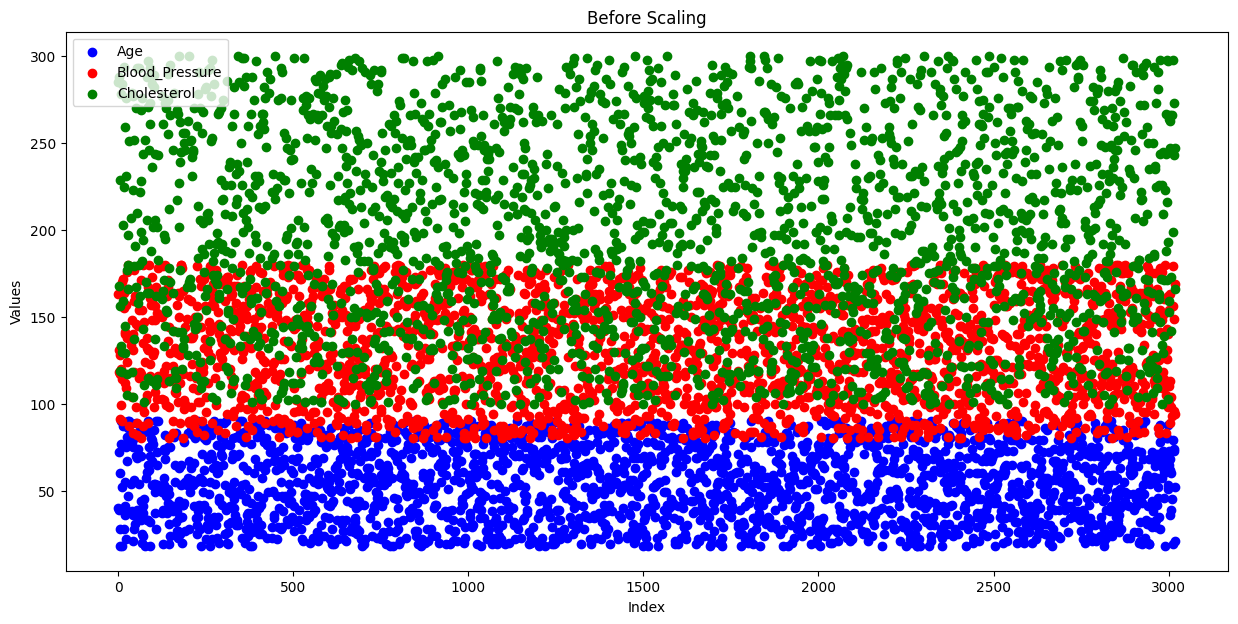

In [278]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
for col, color in zip(['Age', 'Blood_Pressure', 'Cholesterol'], ['blue', 'red', 'green']):
    plt.scatter(X_train.index, X_train[col], label=col, color=color)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Before Scaling')
plt.legend()

plt.show()

In [279]:
scaler=StandardScaler()
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])


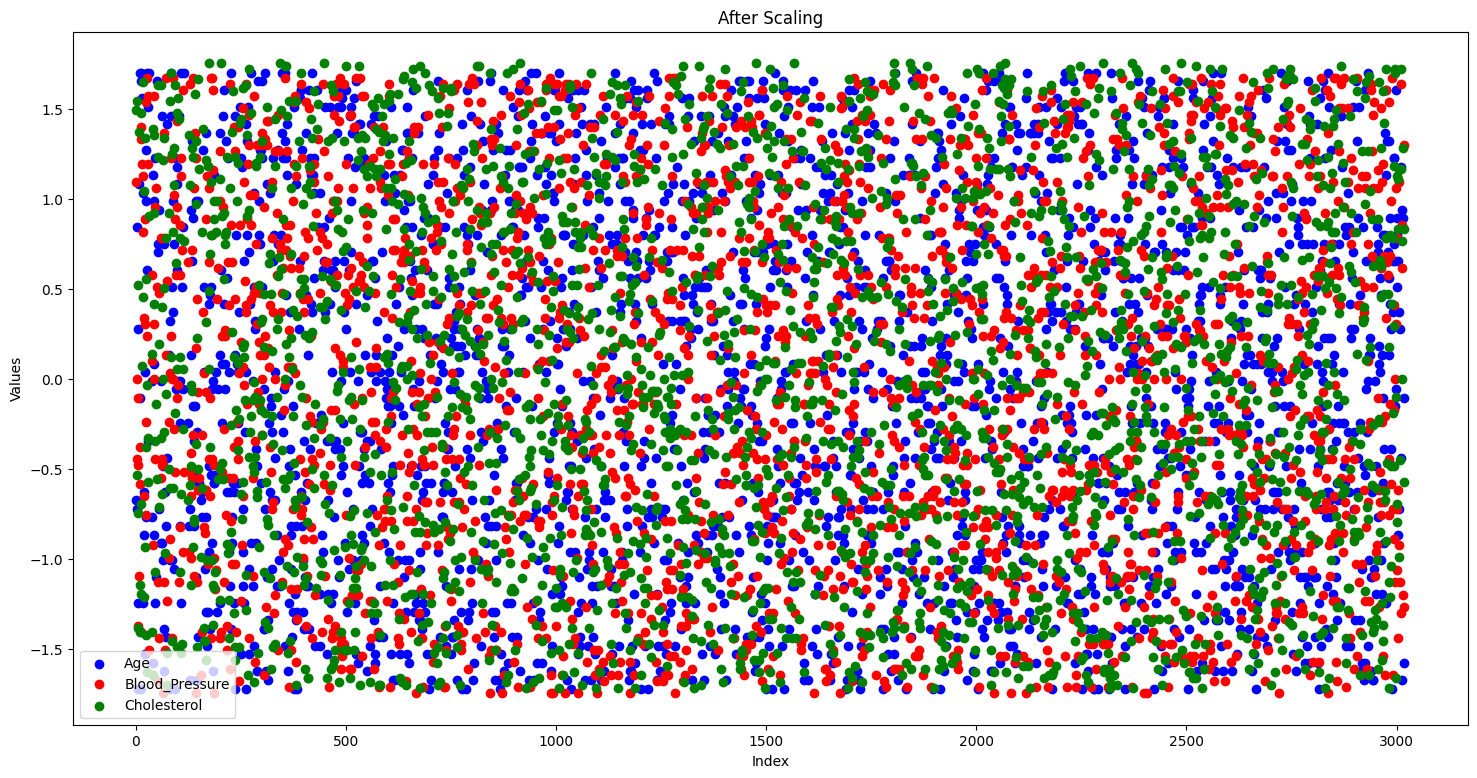

In [280]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
for col, color in zip(['Age', 'Blood_Pressure', 'Cholesterol'], ['blue', 'red', 'green']):
    plt.scatter(X_train.index, X_train[col], label=col, color=color)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('After Scaling')
plt.legend()

plt.show()

values are scaled from -1.5 to 1.5

In [281]:
X_train.describe()

Age  Blood_Pressure   Cholesterol
count  2.400000e+03    2.400000e+03  2.400000e+03
mean  -2.035409e-17   -8.733754e-17  1.384078e-16
std    1.000208e+00    1.000208e+00  1.000208e+00
min   -1.718986e+00   -1.745100e+00 -1.714838e+00
25%   -8.639364e-01   -8.559351e-01 -8.301294e-01
50%   -8.886972e-03   -9.689616e-04 -3.215740e-02
75%    8.461624e-01    8.539972e-01  8.698979e-01
max    1.701212e+00    1.674765e+00  1.754606e+00

## Encoding categorical variables - One Hot Encoding

In [282]:
X_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [283]:
from sklearn.preprocessing import OneHotEncoder

In [284]:
ohe= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[categorical_cols])
encoded_train=ohe.transform(X_train[categorical_cols])
encoded_test=ohe.transform(X_test[categorical_cols])

feature_names = ohe.get_feature_names_out(categorical_cols)

#Creating dataframes for encoded data
encoded_train_df = pd.DataFrame(encoded_train, columns=feature_names, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=feature_names, index=X_test.index)

#Concatenate with numerical features and bring them all together
X_train_encoded = pd.concat([X_train.drop(columns=categorical_cols), encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=categorical_cols), encoded_test_df], axis=1)


In [285]:
X_train

Age  Gender  Blood_Pressure  Cholesterol
720   1.653709    Male        0.204223    -1.697490
246   0.371135    Male        0.033230    -0.222977
1717 -0.388909    Male        0.888196    -0.795435
1030  0.371135    Male        0.204223    -1.471976
1592  1.606206  Female       -0.342955     0.904592
...        ...     ...             ...          ...
1658 -0.341406    Male        0.067428     0.401523
1115 -1.623980    Male        1.195984    -0.587268
1150 -1.481472  Female       -1.026928    -0.049505
1314  1.463698    Male       -0.753339     0.973981
880   1.273687  Female        0.648805    -1.680143

[2400 rows x 4 columns]

In [286]:
X_train_encoded

Age  Blood_Pressure  Cholesterol  Gender_Female  Gender_Male
720   1.653709        0.204223    -1.697490            0.0          1.0
246   0.371135        0.033230    -0.222977            0.0          1.0
1717 -0.388909        0.888196    -0.795435            0.0          1.0
1030  0.371135        0.204223    -1.471976            0.0          1.0
1592  1.606206       -0.342955     0.904592            1.0          0.0
...        ...             ...          ...            ...          ...
1658 -0.341406        0.067428     0.401523            0.0          1.0
1115 -1.623980        1.195984    -0.587268            0.0          1.0
1150 -1.481472       -1.026928    -0.049505            1.0          0.0
1314  1.463698       -0.753339     0.973981            0.0          1.0
880   1.273687        0.648805    -1.680143            1.0          0.0

[2400 rows x 5 columns]

In [287]:
X_test_encoded

Age  Blood_Pressure  Cholesterol  Gender_Female  Gender_Male
1821  1.558704       -0.821736    -0.032157            0.0          1.0
1210 -0.056390        1.401175    -0.153588            0.0          1.0
1837  0.561146       -0.650743    -1.003602            0.0          1.0
271  -1.196456       -0.821736    -1.489324            1.0          0.0
2525  0.133621       -1.710901     1.615828            0.0          1.0
...        ...             ...          ...            ...          ...
2107 -0.056390       -1.505709     1.268884            1.0          0.0
619   1.321190       -0.924332    -0.587268            0.0          1.0
1776  0.228627        0.922394    -0.778088            1.0          0.0
1343 -0.151395       -1.642504    -0.916866            1.0          0.0
662   1.701212        0.238422    -1.680143            1.0          0.0

[601 rows x 5 columns]